In [1]:
import cv2

In [46]:
def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3,5)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face
    
    cap = cv2.VideoCapture(0)
    img_id = 60
    
    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame),(512,512))
            #face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
            #file_name_path = "data/"+"Surya."+str(img_id)+".jpg"
            file_name_path = "Images for visualiation/"+str(img_id)+".jpg"
            cv2.imwrite(file_name_path,face)
            cv2.putText(face,str(img_id),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            
            cv2.imshow("cropped_Face",face)
            if cv2.waitKey(1)==13 or int(img_id)==70:
                break
                
    
    cap.release()
    cv2.destroyAllWindows()
    print("collecting samples is completed  !!!")
generate_dataset()    

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\HP\AppData\Local\Temp\ipykernel_9916\386509787.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


collecting samples is completed  !!!


In [2]:
def my_label(image_name):
    name = image_name.split('.')[-3] # as my name is Ankit.1.jpg , so , it will jump three values and get the core name i.e Ankit
# #     FOR ONLY TWO DATA 
#     if name =="Aditya":
#         return np.array([1,0])
    
#     elif name == "Ankit":
#         return np.array([0,1])

# # FOR THREE DATA
    
    
    if name =="Aditya":
        return np.array([1,0,0,0,0,0])
    elif name =="Akshay":
        return np.array([0,1,0,0,0,0])
    elif name =="Attesar":
        return np.array([0,0,1,0,0,0])
    elif name =="Mukul":
        return np.array([0,0,0,1,0,0])
    elif name =="Partha":
        return np.array([0,0,0,0,1,0])
    elif name =="Surya":
        return np.array([0,0,0,0,0,1])
   

In [3]:
!pip install tqdm


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Creation of data into array i.e image into numpy array

import os 
from random import shuffle 
from tqdm import tqdm

In [5]:
import numpy as np

In [6]:
def my_data():
    data = []
    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data,(50,50))
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)
    return data

In [7]:
data = my_data()

100%|███████████████████████████████████████████████████████████████████████████████| 900/900 [00:04<00:00, 221.18it/s]


In [8]:
train = data[:700] 
test = data[700:]
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train =[i[1] for i in train]

X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)
y_test =[i[1] for i in test]

(700, 50, 50, 1)
(200, 50, 50, 1)


In [9]:
import numpy as np

y_train = np.array(y_train)
print(y_train.shape)

(700, 6)


In [10]:
import numpy as np

y_test = np.array(y_test)
print(y_test.shape)

(200, 6)


In [11]:
! pip install tflearn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# CREATION OF MODEL 

import tensorflow as tf 
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [13]:
#tf.reset_default_graph()
convnet = input_data(shape=[50,50,1])
convnet = conv_2d(convnet,32,5, activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,64,5,activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,128,5,activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,64,5,activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,32,5,activation='relu')
convnet = max_pool_2d(convnet,5)

convnet = fully_connected(convnet,1024,activation='relu')
convnet = dropout(convnet,0.8)
convnet = fully_connected(convnet, 6, activation='softmax')
convnet = regression(convnet, optimizer='adam',learning_rate = 0.001, loss='categorical_crossentropy')
model = tflearn.DNN(convnet, tensorboard_verbose=1)
model.fit(X_train ,y_train, n_epoch=30, validation_set=(X_test, y_test),show_metric = True, run_id="FRS")

Training Step: 329  | total loss: 1.14467 | time: 1.027s
| Adam | epoch: 030 | loss: 1.14467 - acc: 0.9269 -- iter: 640/700
Training Step: 330  | total loss: 1.03027 | time: 2.129s
| Adam | epoch: 030 | loss: 1.03027 - acc: 0.9342 | val_loss: 0.01628 - val_acc: 0.9950 -- iter: 700/700
--


In [14]:
def data_for_visualisation():
    Vdata = []
    for img in tqdm(os.listdir("Images for visualiation")):
        path = os.path.join("Images for visualiation", img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50, 50))
        Vdata.append([np.array(img_data), img_num])
    
    shuffle(Vdata)
    return Vdata

In [15]:
Vdata = data_for_visualisation()

100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 319.12it/s]


In [16]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


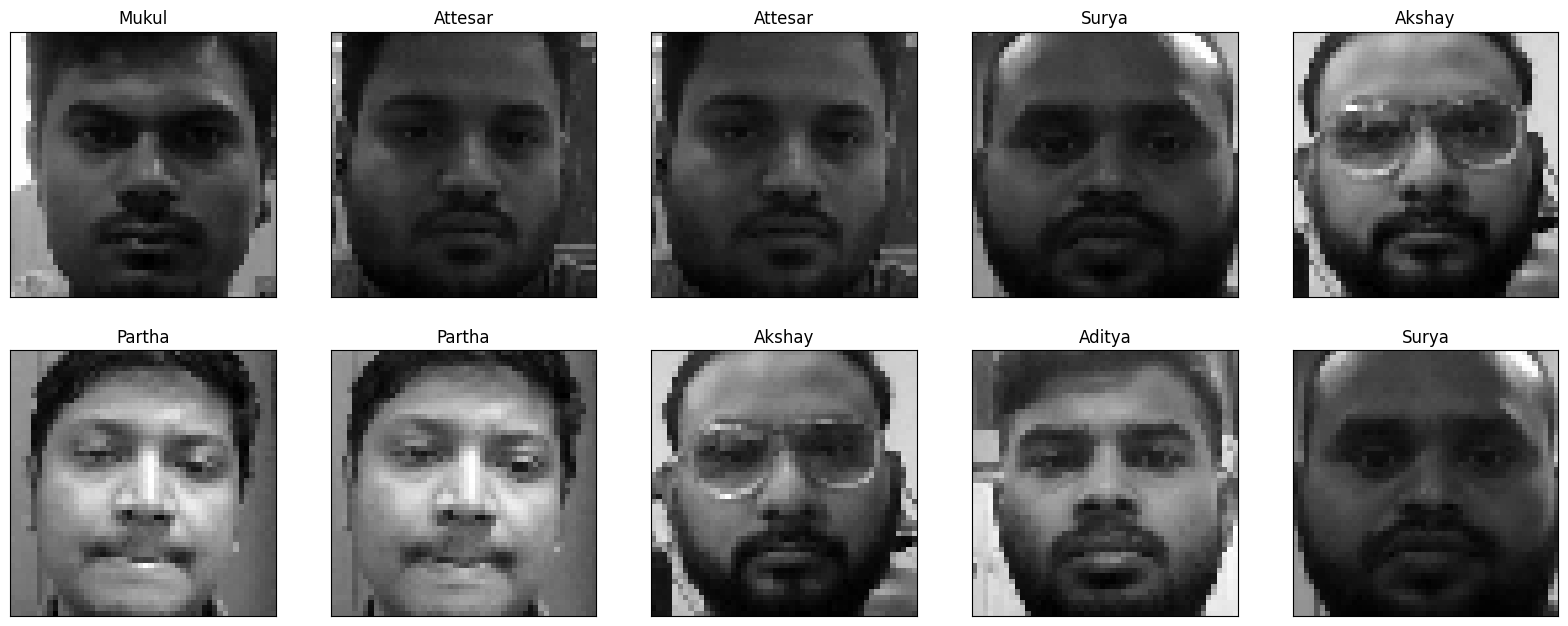

In [17]:
import matplotlib.pyplot as plt 

fig=plt.figure(figsize=(20,20))
for num , data in enumerate(Vdata[:10]):
    img_data=data[0]
    y=fig.add_subplot(5,5,num+1)
    image =img_data
    data=img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
    
#     [0.8,0.1,0.1]
#     [0.2,0.6,0.2]
#     [0.1,0.2,0.7]
    
    if np.argmax(model_out)==0:
        my_label = 'Aditya'
    elif np.argmax(model_out)==1:
        my_label ="Akshay"
    elif np.argmax(model_out)==2:
        my_label ='Attesar'
    elif np.argmax(model_out)==3:
        my_label ="Mukul"
    elif np.argmax(model_out)==4:
        my_label ="Partha"
    elif np.argmax(model_out)==5:
        my_label ="Surya"
  
    else:
        my_label ='Unknown'
        
        
    y.imshow(image,cmap='gray')
    plt.title(my_label)
    
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()    

In [21]:
#FROM HERE TRYING TO CONVERT THIS CODES INTO LIVE FORMAT WITHOUT SAVING INTO images_for_visualisation

In [18]:
def draw_label(img,text,pos,bg_color):
    
    text_size = cv2.getTextSize(text,cv2.FONT_HERSHEY_SIMPLEX,1,cv2.FILLED)
    
    end_x = pos[0]+text_size[0][0]+ 2 
    end_y = pos[1]+text_size[0][1]- 2 
    
    cv2.rectangle(img,pos,(end_x ,end_y),bg_color,cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),1,cv2.LINE_AA)

In [19]:
import cv2

In [20]:
cap = cv2.VideoCapture(0)

In [21]:
haar =cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [22]:
def live_image_cam(img):
    coods = haar.detectMultiScale(img)
    return coods

In [24]:
# NOW CONVERTING THE CODES TO WRITE INTO EXCEL

In [25]:
import os

In [26]:
! pip install pandas 


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd 

In [28]:
# CALLING data_for_visualisation
data_attend = data_for_visualisation()

100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 417.90it/s]


In [29]:
! pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip install opencv-python
!pip install tensorflow
!pip install pandas
!pip install xlsxwriter


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import datetime 

In [32]:
from tensorflow.keras.models import load_model

In [34]:
import cv2
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime

# Load your trained model
# model_path = 'path/to/your/model.h5'
# model = tf.keras.models.load_model(model_path)

# Set up the webcam and Excel writer
cap = cv2.VideoCapture(0)  # 0 for default webcam
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Create an Excel writer
writer = pd.ExcelWriter('predictions.xlsx', engine='xlsxwriter')

# Define class labels
class_labels = ["Aditya","Akshay", "Attesar","Mukul","Partha","Surya"]

# Create an empty prediction DataFrame
prediction_df = pd.DataFrame(columns=['Prediction', 'Present/Absent', 'Date of Attendance', 'Entry Time'])

# Maintain a list of names already printed
printed_names = []


while True:
    ret, frame = cap.read()

    # Perform face detection or any other necessary processing
    # ...

    coods = live_image_cam(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))


    for x, y, w, h in coods:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)

        # Perform object classification on the resized object region
        obj_img = frame[y:y+h, x:x+w]
        obj_img = cv2.resize(obj_img, (50, 50))
        obj_gray = cv2.cvtColor(obj_img, cv2.COLOR_BGR2GRAY)
        obj_gray = np.uint8(obj_gray)  # Ensure image depth is CV_8U

        obj_input = np.expand_dims(obj_gray, axis=0)
        obj_input = np.expand_dims(obj_input, axis=-1)  # Add channel dimension

        res = model.predict(obj_input)[0]

        # Display the result on the frame
        predicted_class_index = np.argmax(res)
        predicted_class_label = class_labels[predicted_class_index]
        
        # Check if the name has already been printed
        if predicted_class_label not in printed_names:
            # Create a new row with the prediction details
            new_row = pd.DataFrame({
                'Prediction': [predicted_class_label],
                'Present/Absent': ['Present'],  # Assuming the person is present
                'Date of Attendance': [datetime.date.today()],
                'Entry Time': [datetime.datetime.now().time()]
            })

            # Concatenate the new row to the prediction DataFrame
            prediction_df = pd.concat([prediction_df, new_row], ignore_index=True)

            # Add the name to the printed_names list
            printed_names.append(predicted_class_label)

        # Write the updated prediction DataFrame to the Excel sheet
        prediction_df.to_excel(writer, index=False, sheet_name='Predictions')

        cv2.putText(frame, 'Prediction: {}'.format(predicted_class_label), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Webcam', frame)

    # Exit the loop if 'x' is pressed
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
        
writer.close()

# Release the webcam and close the windows
cap.release()
cv2.destroyAllWindows()